# Exploratory Data Analysis With Machine Learning and Pandas

### Dataset Name - Algerian Forest Fire

### 0) Dataset download link 

 Dataset Link - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

### 1) Problem statement. 

### 2) Data Collection 

#### Importing Required Libraries 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

#### Reading dataset

In [55]:
df = pd.read_csv("forest_fire.csv")
df.drop(index=[122,123,124], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Shape of dataset

In [56]:
df.shape

(244, 14)

#### Statistics Summary of the dataset 

In [57]:
df.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,8
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [58]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [59]:
df.replace('14.6 9', '14.69',inplace=True)
df.drop(index=165,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(167)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire
163,12,7,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
165,15,7,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


In [60]:
len(df.columns)

14

In [61]:

df.set_axis(['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes'], axis=1,inplace=True)

In [62]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [63]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [64]:
for feature in ['Classes']:
    df[feature] = df[feature].str.replace(' ', '')

In [66]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [67]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64'}

df=df.astype(datatype_convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


In [68]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire


In [69]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


### 3) Exploring Data

In [70]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 1 categorical features : ['Classes']


#### Attribute information

### Univarite Analysis

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



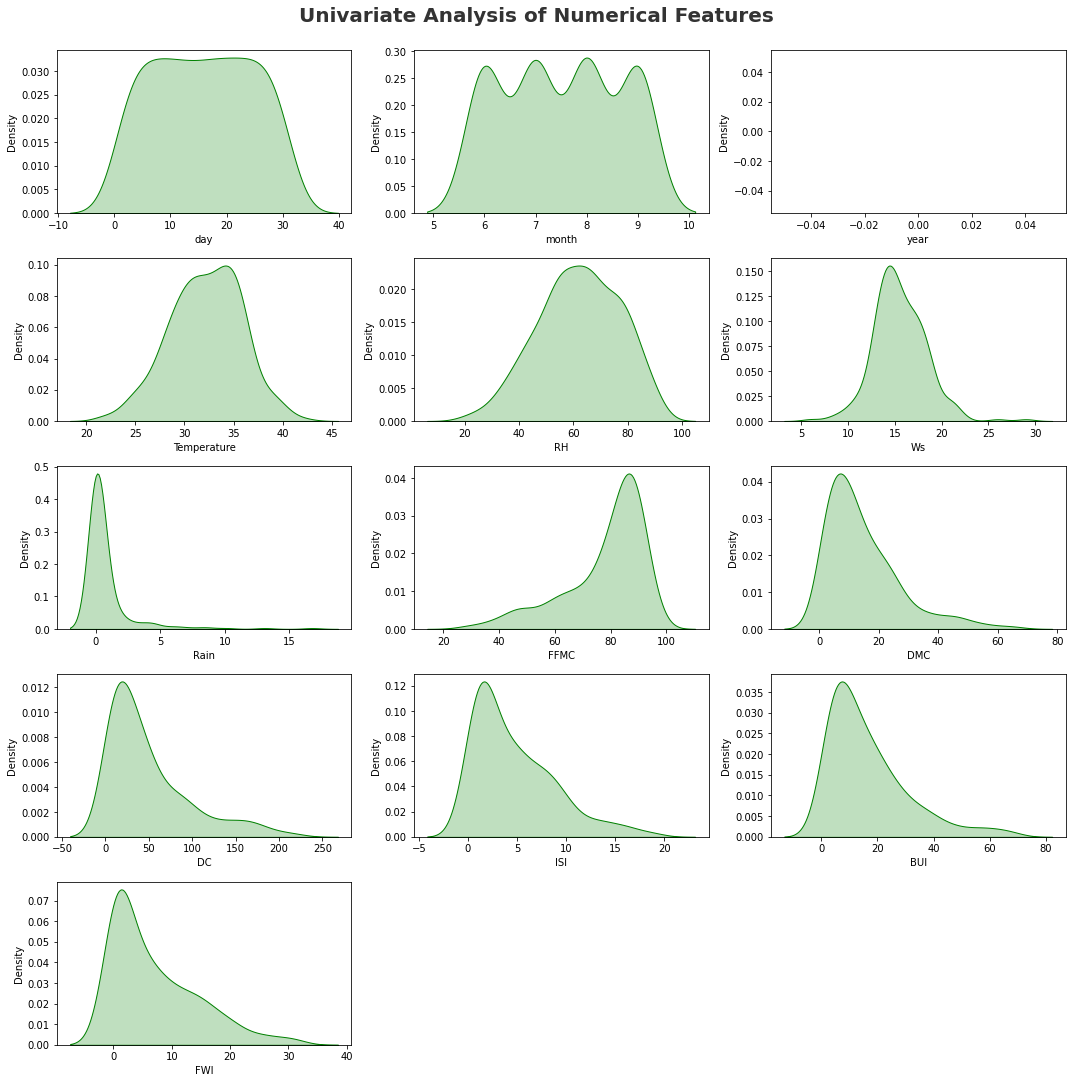

In [71]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Observation from above graphs

### Multivariate Analysis

#### Checking Multicolinarity

In [72]:
df[(list(df.columns)[1:])].corr()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
month,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.065608,NaN,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895


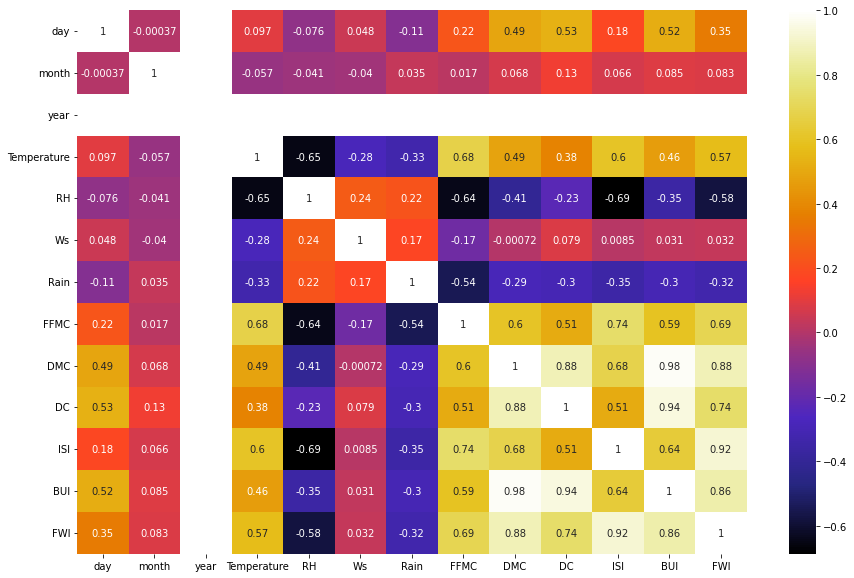

In [73]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

#### Observation from above heatmap

### 4) Visualization

#### 4.1 Visualize the Target Feature 

In [74]:
px.histogram(df, x='Classes')

#### Observation from above histogram

### 4.2) Let's see fire and no fire per region

In [75]:
df['Region'] = 0

In [76]:
df.loc[0:123,"Region"] = 1

In [77]:
df["Region"]

0      1
1      1
2      1
3      1
4      1
      ..
238    0
239    0
240    0
241    0
242    0
Name: Region, Length: 243, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

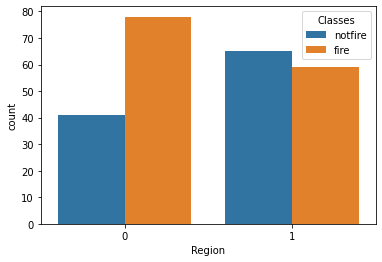

In [78]:
sns.countplot(data = df, x = 'Region', hue = 'Classes')

In [79]:
px.histogram(df, x='Region',color='Classes', title="Fire and No fire per region", nbins=3)

#### Observation from above graph


### 4.3)Fire Per month

<AxesSubplot:xlabel='month', ylabel='count'>

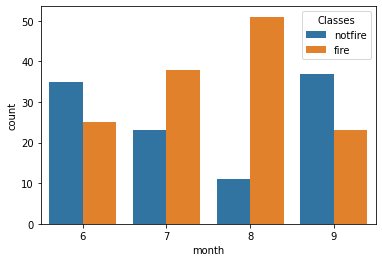

In [80]:
sns.countplot(data=df, x='month', hue='Classes')

In [81]:
px.histogram(df, x="month", color="Classes" , nbins = 12)

#### Observation from above histogram

### 4.4) Fire per region per Month

In [82]:
px.bar(df, x="month",y='Region',color="Classes", barmode='group' )

### 4.5) Relation of Temprature with fire

<AxesSubplot:xlabel='Temperature', ylabel='count'>

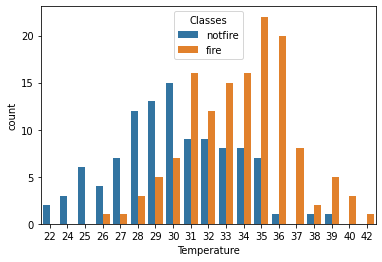

In [83]:
sns.countplot(data=df, x='Temperature', hue='Classes')

### Observartion from above graph 

## 5) Conclusion 

In [ ]:

1) FWI, BUI, ISI, DC, DMC, Rain are right skewed.
2) FFMC is left skewed.
3) Temprature, WS, RH are almost normal distributed.
4)Classes varibale i.e. our target variabale/feature has negative correlation with the Rain,Ws,RH
5)Classes variable has high correlation with the FFMC,ISI,FWI and somewhat with DMC and DC
6)No fire count is 106
7)the fire count is 137
8)this means that fire is more likely to happen than no fire
Region 0 -  Bejaia region
Region 1 -  Sidi Bel-abbes region
i) Region 0 :
        Fire Count - 59
        Not Fire Count - 63
ii) Region 1 :
        Fire Count - 78
        Not Fire Count - 43

Region 0 has more fire count than region 1
9)8th Month has highest number of fire count 51 followed by 7th Month 38 and 6th month 25
10)9th Month has highest number of not fire count 37 
11)as the temprature increases the chances of fire are also increases.
12)when the temprature increases above 30 degree celcius the no of chances of fire increases very high

## Deploy machine learning model

<ol>
    <li>To deploy a model on data set first we have to remove outliers if any.</li>
    <li>Sometimes ooutliers are also important, it is not compulsury everytime that we have to remove outliers.</li>
    <li>But I am removing outliers if any, because I don't need any outliers.</li>
</ol>

### Removing and Visualizing Outliers

To Visualize the outliers we will use <em>BoxPlot</em>, As the <em>BoxPlot</em> is Excellent plot to see Outliers.

<AxesSubplot:>

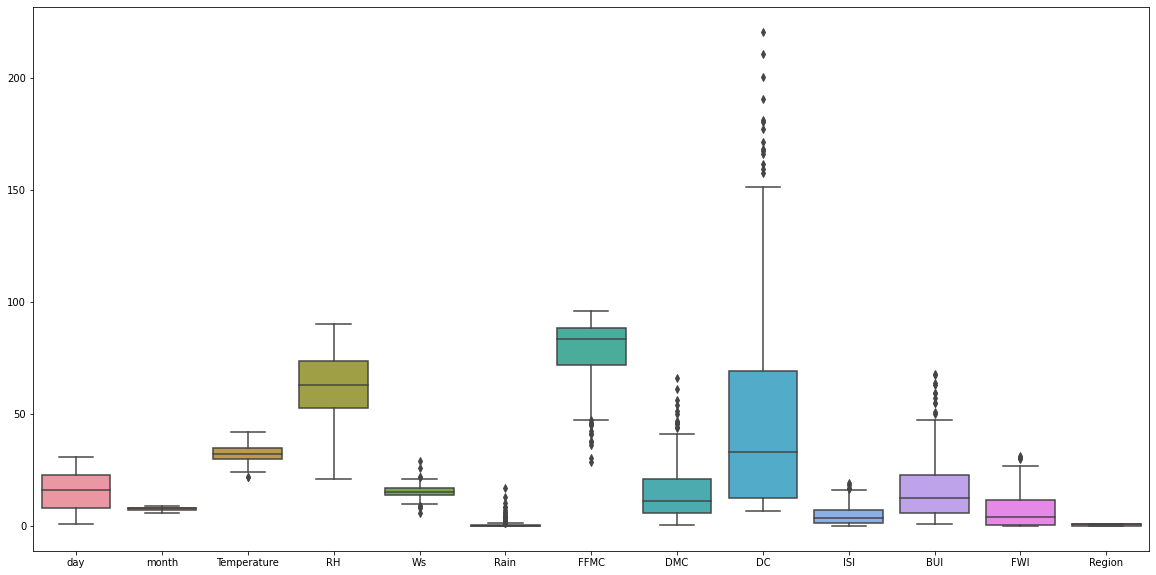

In [84]:
plt.subplots(figsize=(20,10))
df1 = df
df1 = df1.drop(columns='year')

sns.boxplot(data=df1, orient='v')

#### Observation from above plot
<br>
<ul>
    <li>DC feature has most outliers.</li>
    <li>DMC, BUI, RAIN, FFMC, WS, ISI, and FWI has also outliers.</li>
</ul>

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

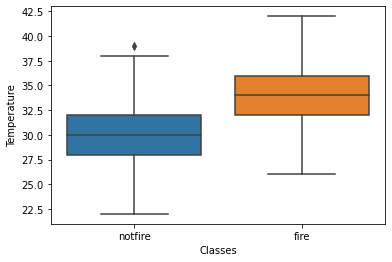

In [85]:
sns.boxplot(x ='Classes', y ='Temperature', data = df)

#### As DC and DMC has many outliers I am dropping those columns/feature

In [86]:
df = df.drop(columns = ('DC'), axis = 1)
df = df.drop(columns = ('DMC'), axis = 1)

## Seggregating dependent and independent feature/variable/column

<ul>
    <li>My target feature is Classes.</li>
</ul>

In [87]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,1.3,3.4,0.5,notfire,1
1,2,6,2012,29,61,13,1.3,64.4,1.0,3.9,0.4,notfire,1
2,3,6,2012,26,82,22,13.1,47.1,0.3,2.7,0.1,notfire,1
3,4,6,2012,25,89,13,2.5,28.6,0.0,1.7,0.0,notfire,1
4,5,6,2012,27,77,16,0.0,64.8,1.2,3.9,0.5,notfire,1


As target variable is object.
<br>
Let's convert it into numerical form

In [89]:
df['Classes']=df['Classes'].map({'notfire':0,'fire':1})
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,1.2,3.9,0.5,0,1


In [91]:
df['Classes'].isnull().sum()

0

In [92]:
df = df.drop(columns=['year'])

In [93]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4,0,1
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1,0,1
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5,0,1


In [99]:
x = df.iloc[:, 0:10] 
y = df.iloc[:, 11]

In [100]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,4.5,16.9,6.5
239,27,9,28,87,15,4.4,41.1,0.1,6.2,0.0
240,28,9,27,87,29,0.5,45.9,0.4,3.4,0.2
241,29,9,24,54,18,0.1,79.7,1.7,5.1,0.7


In [101]:
y

0      1
1      1
2      1
3      1
4      1
      ..
238    0
239    0
240    0
241    0
242    0
Name: Region, Length: 243, dtype: int64

### to test any mathematical model we have to divide dataset into train and test dataset

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [104]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI
226,14,9,28,81,15,0.0,84.6,4.3,14.3,5.7
65,5,8,34,65,13,0.0,86.8,5.2,11.5,6.1
168,18,7,33,68,15,0.0,86.1,5.2,23.9,9.1
206,25,8,34,40,18,0.0,92.1,14.3,59.5,31.1
144,23,6,33,59,16,0.8,74.2,1.6,6.7,0.8
...,...,...,...,...,...,...,...,...,...,...
106,15,9,24,82,15,0.4,44.9,0.2,1.4,0.0
14,15,6,28,80,17,3.1,49.4,0.4,3.0,0.1
92,1,9,25,76,17,7.2,46.0,0.2,1.8,0.1
179,29,7,34,59,16,0.0,88.1,7.4,19.5,10.9


In [105]:
X_test

,day,month,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI
24,25,6,31,64,15,0.0,86.7,5.7,18.3,8.4
6,7,6,33,54,13,0.0,88.2,6.4,10.9,7.2
152,1,7,28,58,18,2.2,63.7,1.2,3.3,0.5
232,20,9,34,58,13,0.2,79.5,2.1,24.4,3.8
238,26,9,30,65,14,0.0,85.4,4.5,16.9,6.5
...,...,...,...,...,...,...,...,...,...,...
241,29,9,24,54,18,0.1,79.7,1.7,5.1,0.7
5,6,6,31,67,14,0.0,82.6,3.1,7.0,2.5
56,27,7,36,48,13,0.0,90.3,8.7,29.4,15.3
124,3,6,29,80,14,2.0,48.7,0.3,2.6,0.1


In [106]:
Y_train

226    0
65     1
168    0
206    0
144    0
      ..
106    1
14     1
92     1
179    0
102    1
Name: Region, Length: 162, dtype: int64

In [107]:
Y_test

24     1
6      1
152    0
232    0
238    0
      ..
241    0
5      1
56     1
124    0
147    0
Name: Region, Length: 81, dtype: int64

## Standardization 

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:

X_train = scaler.fit_transform(X_train)

In [110]:
X_test = scaler.transform(X_test)

In [111]:
X_train

array([[-0.18998654,  1.40355772, -1.12656349, ..., -0.11433646,
        -0.20093835, -0.19543585],
       [-1.21212815,  0.49039968,  0.52256258, ...,  0.09352209,
        -0.38763567, -0.14405961],
       [ 0.26429862, -0.42275835,  0.24770824, ...,  0.09352209,
         0.43916677,  0.24126219],
       ...,
       [-1.66641331,  1.40355772, -1.95112653, ..., -1.06124763,
        -1.03440854, -0.91470322],
       [ 1.5135828 , -0.42275835,  0.52256258, ...,  0.60162077,
         0.14578526,  0.47245527],
       [-0.53070041,  1.40355772, -0.5768548 , ..., -0.85338908,
        -0.99440197, -0.8890151 ]])

In [112]:
X_test

array([[ 1.05929765e+00, -1.33591638e+00, -3.02000454e-01,
         8.02841227e-02, -2.27628673e-01, -3.84476576e-01,
         6.43451873e-01,  2.08999063e-01,  6.57721173e-02,
         1.51353770e-01],
       [-9.84985567e-01, -1.33591638e+00,  2.47708237e-01,
        -5.90129685e-01, -9.87955373e-01, -3.84476576e-01,
         7.49493788e-01,  3.70666824e-01, -4.27642239e-01,
        -2.77495126e-03],
       [-1.66641331e+00, -4.22758348e-01, -1.12656349e+00,
        -3.21964162e-01,  9.12861378e-01,  6.02042154e-01,
        -9.82524172e-01, -8.30293687e-01, -9.34392119e-01,
        -8.63326980e-01],
       [ 4.91441198e-01,  1.40355772e+00,  5.22562583e-01,
        -3.21964162e-01, -9.87955373e-01, -2.94793055e-01,
         1.34450676e-01, -6.22435137e-01,  4.72505573e-01,
        -4.39472995e-01],
       [ 1.17286894e+00,  1.40355772e+00, -5.76854799e-01,
         1.47325503e-01, -6.07792023e-01, -3.84476576e-01,
         5.51548879e-01, -6.81456700e-02, -2.75765448e-02,
        -9.

## Model Training

### Linear regression model

In [113]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [115]:
regression = LinearRegression()

In [116]:
regression.fit(X_train, Y_train) 

LinearRegression()

#### Coefficient and Intercept of linear regression model

In [117]:
## print the Coefficients
print(regression.coef_)

[-0.05107744 -0.03067864  0.04894725  0.18861686  0.07092937 -0.04475434
 -0.04740807 -0.172434   -0.03494875  0.18751884]


In [118]:
## print the intercept
print(regression.intercept_)

0.5061728395061729


In [120]:
## Prediction for the Test data
reg_pred = regression.predict(X_test)

In [121]:
reg_pred

array([ 0.45401268,  0.36039324,  0.58670945,  0.34801238,  0.3460424 ,
        0.40480474,  0.62051202,  0.10127544,  0.66256645,  0.34511403,
        0.828377  ,  0.38268666,  0.2035078 ,  0.39117892,  0.50566471,
        0.37157063, -0.05352796,  0.95925293,  0.62572235,  0.38864635,
        0.81527076,  0.81021503,  0.17889536,  0.792903  ,  0.11557278,
        0.2899014 ,  0.53436838,  0.52893121,  0.71092969,  0.54316326,
        0.70470047,  0.33057925,  0.53424362,  0.57591   ,  0.41189657,
        0.53627461,  0.62979702,  0.24776392,  0.94605693,  1.14209739,
        0.384363  ,  0.1398748 ,  0.17526273,  1.04718286,  0.13106926,
        0.60760881,  0.77869999,  0.61588009,  0.38592152,  0.5299301 ,
        0.2124701 ,  0.29814062,  0.29970806,  0.5034817 ,  0.42974041,
        0.73018471,  0.43512591,  0.35195527,  0.51667881,  0.03094135,
        0.53283796,  0.71443965,  0.67608729,  0.03213464,  0.57599961,
        0.1423491 ,  0.52224041,  0.34044396,  0.14040205,  0.91

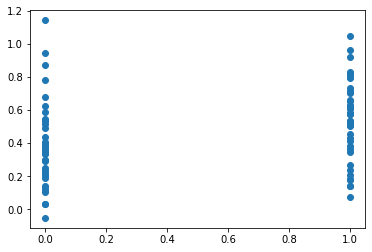

In [122]:
plt.scatter(Y_test, reg_pred)

In [123]:
## Calculating Residual
residuals = Y_test - reg_pred

In [124]:
residuals

24     0.545987
6      0.639607
152   -0.586709
232   -0.348012
238   -0.346042
         ...   
241   -0.233091
5      0.423284
56     0.765806
124   -0.869035
147   -0.492616
Name: Region, Length: 81, dtype: float64

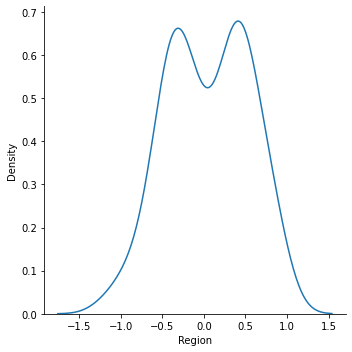

In [125]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals, kind ="kde")

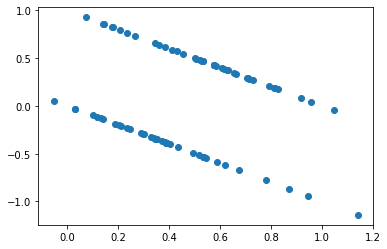

In [126]:
## Scatter Plot with predictions and residual
### Uniform Distributions
plt.scatter(reg_pred, residuals) 

### Performance Matrix

In [127]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [128]:
print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

0.2419072767883365
0.42945856367422935
0.49184070265517527


### R squared and Adjusted r Square

In [129]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.031041731985179677


In [131]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-0.10738087773122307

## Ridge regression 

In [132]:
## Ridge Regression
from sklearn.linear_model import Ridge

In [134]:
ridge=Ridge()

In [135]:
ridge.fit(X_train,Y_train)


Ridge()

### Coefficients and the intercept

In [138]:
print(ridge.coef_)

[-0.05029178 -0.03048404  0.04634164  0.18637236  0.0693993  -0.04385229
 -0.05154331 -0.13867637 -0.01235541  0.13927043]


In [139]:
print(ridge.intercept_)

0.5061728395061729


In [140]:
## Prediction for the Test data
ridge_pred = ridge.predict(X_test)

In [141]:
ridge_pred 

array([ 0.45377105,  0.36108887,  0.58469965,  0.35958982,  0.34826011,
        0.4082171 ,  0.61938913,  0.10252566,  0.67015599,  0.34860251,
        0.82401417,  0.38905882,  0.2046523 ,  0.38369278,  0.49657852,
        0.37280448, -0.03384519,  0.95547884,  0.62227931,  0.387609  ,
        0.80970951,  0.8075479 ,  0.18399032,  0.78795358,  0.11851892,
        0.28782752,  0.5342835 ,  0.52476641,  0.71452298,  0.54016391,
        0.70298074,  0.33137073,  0.53145124,  0.57004303,  0.41276712,
        0.53589855,  0.62824929,  0.25080631,  0.94179753,  1.1330947 ,
        0.38689453,  0.14380425,  0.17819329,  1.03974167,  0.12970843,
        0.60338714,  0.77455686,  0.61614722,  0.38073275,  0.53085054,
        0.20393801,  0.29690645,  0.30504272,  0.49867233,  0.42398387,
        0.74460932,  0.43532769,  0.35112587,  0.51513299,  0.02901877,
        0.52931044,  0.71314209,  0.67260432,  0.03668366,  0.57799314,
        0.14705181,  0.51690383,  0.34361053,  0.13994077,  0.91

Text(0, 0.5, 'Test Predicted Data')

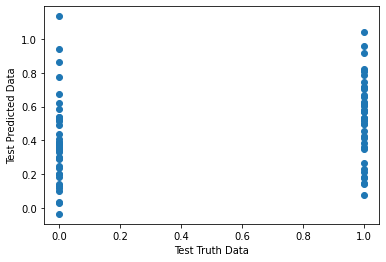

In [142]:
plt.scatter(Y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [143]:
## Calculating residuals:-
residuals=Y_test- ridge_pred

In [144]:
residuals

24     0.546229
6      0.638911
152   -0.584700
232   -0.359590
238   -0.348260
         ...   
241   -0.237245
5      0.424623
56     0.769403
124   -0.864037
147   -0.488737
Name: Region, Length: 81, dtype: float64

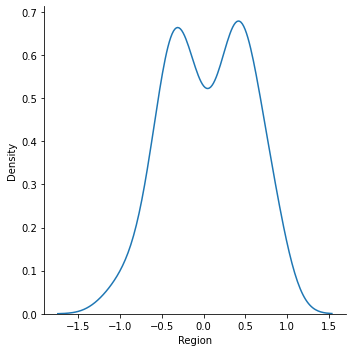

In [145]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

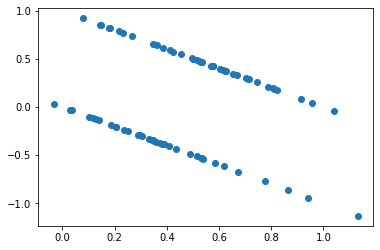

In [146]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_pred,residuals)

### Performance matrix

In [147]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

0.24114999252155572
0.4291706467474964
0.49107025212443456


### R square and Adjusted R square

In [148]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.03407502995486755


In [149]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-0.10391425148015143

## Lasso Regression

In [150]:
## Lasso Regression
from sklearn.linear_model import Lasso


In [151]:
lasso = Lasso()

In [152]:
lasso.fit(X_train,Y_train)

Lasso()

### Coefficients and Intercept

In [153]:
## print the coefficients
print(lasso.coef_)

[-0. -0. -0.  0.  0.  0. -0. -0. -0. -0.]


In [154]:
## print the Intercept
print(lasso.intercept_)

0.5061728395061729


In [155]:
## Prediction for the Test data
lasso_pred = lasso.predict(X_test)

In [156]:
lasso_pred

array([0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617284,
       0.50617284, 0.50617284, 0.50617284, 0.50617284, 0.50617

Text(0, 0.5, 'Test Predicted Data')

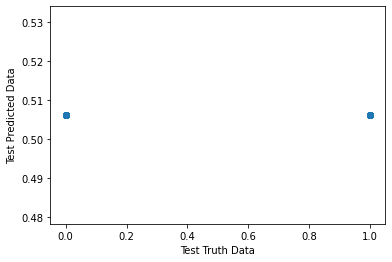

In [158]:
## Relationship Between Real Data & Predicted Data.
plt.scatter(Y_test,lasso_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [159]:
## Calculating residuals
residuals=Y_test- lasso_pred

In [160]:
residuals

24     0.493827
6      0.493827
152   -0.506173
232   -0.506173
238   -0.506173
         ...   
241   -0.506173
5      0.493827
56     0.493827
124   -0.506173
147   -0.506173
Name: Region, Length: 81, dtype: float64

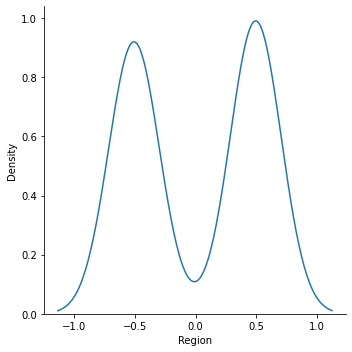

In [161]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

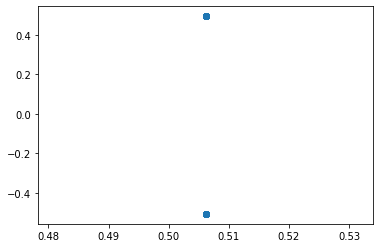

In [162]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,residuals)

### Performance matrics

In [163]:

## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))


0.24980948026215521
0.4997713763145863
0.4998094439505472


## R square and adjusted r square

In [164]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)

-0.0006105006105008304


In [165]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-0.14355485784057231